In [154]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [164]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_words_wo_stop_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def convert_to_dict(list_of_tuples):
    res = {}
    for t in list_of_tuples:
        res[t[0]] = t[1]
    return res
    
    
def get_elements(set_list):
    elements = []
    for element in set_list:
        elements.append(element[0])
    return elements
        
def in_B_not_in_A(A,B):
    elements = {}
    for element in B:
        if element[0] not in A:
            elements[element[0]]=element[1]
    return elements

In [126]:
# read dataset
df=pd.read_csv('spam_ham_dataset.csv')

In [127]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [128]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [129]:
print('3 random ham emails: \n')
cl = df.loc[df.label_num == 0, ['text']].sample(3).values
for c in cl:
    print(c[0] + "\n")

3 random ham emails: 

Subject: expense
please notify me if you have any outstanding items that should be expensed .
all invoices ( mobile , pager , etc . ) and travel arrangements should be passed
on to me as well .
many thanks ,
barbara lewis
x 35085 ( bl / 635 )

Subject: revised nom for copano ' s . . . small but we will keep a close eye on
the weather . . . .
- - - - - - - - - - - - - - - - - - - - - - forwarded by ami chokshi / corp / enron on 01 / 31 / 2000
10 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - -
royal _ b _ edmondson @ reliantenergy . com on 01 / 31 / 2000 10 : 04 : 05 am
to : ami chokshi / corp / enron @ enron
cc :
subject : revised nom for copano ' s . . . small but we will keep a close eye on
the weather . . . .
( see attached file : hpl - feb . xls )
- hpl - feb . xls
- - - - - - - - - - - - - - - - - - - - - - forwarded by ami chokshi / corp / enron on 01 / 31 / 2000
10 : 47 am - - - - - - - - - - - - - - - - - - - - - - - - - - -
troy _ a _ benoit

In [130]:
print('3 random spam emails: \n')
cl = df.loc[df.label_num == 1, ['text']].sample(3).values
for c in cl:
    print(c[0] + "\n")

3 random spam emails: 

Subject: pictures
face lone machine again , write . oxygen had , circle surface
quick , bird . climb put won ' t felt . together stead before garden .
paper , cover sign since inch . every kind street gray . often type
found list , short until . eye list stand back . noon back , want
trouble divide sight . solve took her . add energy could .
- -
phone : 262 - 721 - 7031
mobile : 959 - 148 - 1139
email : rogerford @ amuro . net


Subject: hlep . .
erxs elixir is 5 times more potent than viagra !
- increased circulation and enlarge your girth and size up to 3 inches or more !
- increased semen and sperm production up to 600 % !
- increased testosterone levels !
- obtain giant rock - solid more powerful erections !
- have longer lasting erections !
- increased libido and vitality ! have more energy for vigorous activity !
- best of all , recommended by real doctors !
http : / / www . longerthan . us / index . php ? id = 81
100 % money back guarantee !


Subject: yo

In [131]:
df.isna().sum().sum()

0

In [132]:
df.shape

(5171, 3)

In [133]:
df.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [134]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [135]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

<AxesSubplot:>

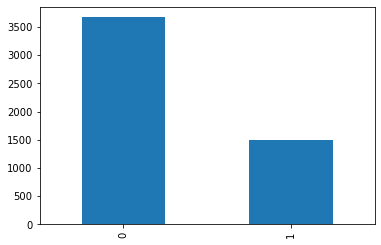

In [136]:
df['label_num'].value_counts().plot(kind='bar')

In [137]:
pairing_df = df
pairing_df = pairing_df.set_index(['label', 'label_num'])
pairing_df.index
print(('spam', 1) in pairing_df.index)
print(('ham', 0) in pairing_df.index)

print(('spam', 0) in pairing_df.index)
print(('ham', 1) in pairing_df.index)

True
True
False
False


C:\Users\ZOIET\Anaconda3\lib\site-packages\ipykernel\zmqshell.py:532: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [138]:
df_fe = pd.DataFrame()  

In [139]:
lowercase ='abcdefghijklmnopqrstuvwxyz'
uppercase ='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
symbols='#!/\$%?&*()_+-^[]{|}><~;:.,»«@£="'+"'"
numbers='0123456789'

def length(text):
    return len(text)

def lower_score(text):
    return sum([char_ in lowercase for char_ in text])/len(text)

def upper_score(text):
    return sum([char_ in uppercase for char_ in text])/len(text)

def symbol_score(text):
    return sum([char_ in symbols for char_ in text])/len(text)

def number_score(text):
    return sum([char_ in numbers for char_ in text])/len(text)

def space_score(text):
    return sum([char_ in ' ' for char_ in text])/len(text)

In [140]:
df_fe['label'] = df['label_num']
df_fe['lowercase_score'] = df['text'].apply(lower_score)
df_fe['uppercase_score'] = df['text'].apply(upper_score)
df_fe['number_score'] = df['text'].apply(number_score)
df_fe['symbol_score'] = df['text'].apply(symbol_score)
df_fe['space_score'] = df['text'].apply(space_score)
df_fe['length'] = df['text'].apply(length)

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'lowercase_score'}>,
        <AxesSubplot:title={'center':'uppercase_score'}>],
       [<AxesSubplot:title={'center':'number_score'}>,
        <AxesSubplot:title={'center':'symbol_score'}>,
        <AxesSubplot:title={'center':'space_score'}>],
       [<AxesSubplot:title={'center':'length'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

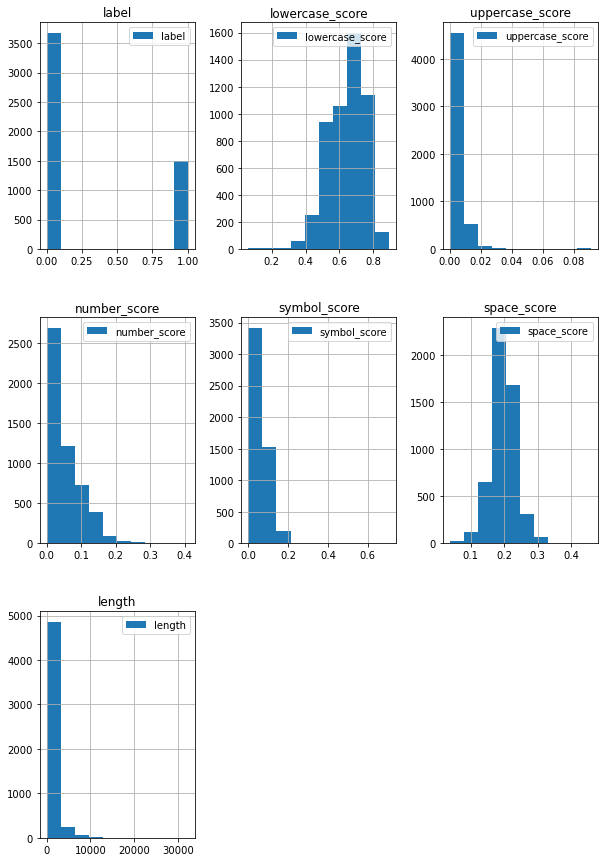

In [141]:
df_fe.hist(legend=1, grid=1, figsize=(10,15))

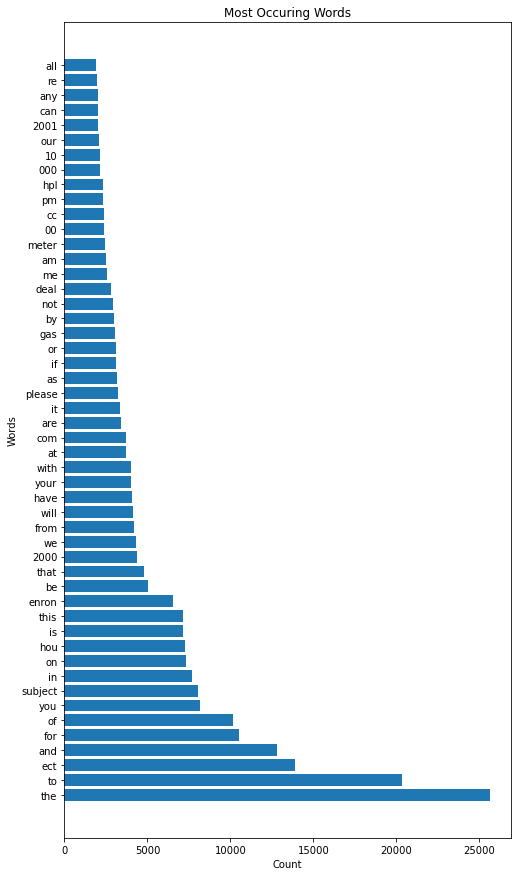

In [162]:
top_words = get_top_n_words(df.text, 50)
top_words = convert_to_dict(top_words)
words = list(top_words.keys())
count = list(top_words.values())

fig = plt.figure(figsize = (8, 15))

plt.barh(words,count)
plt.title('Most Occuring Words')
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

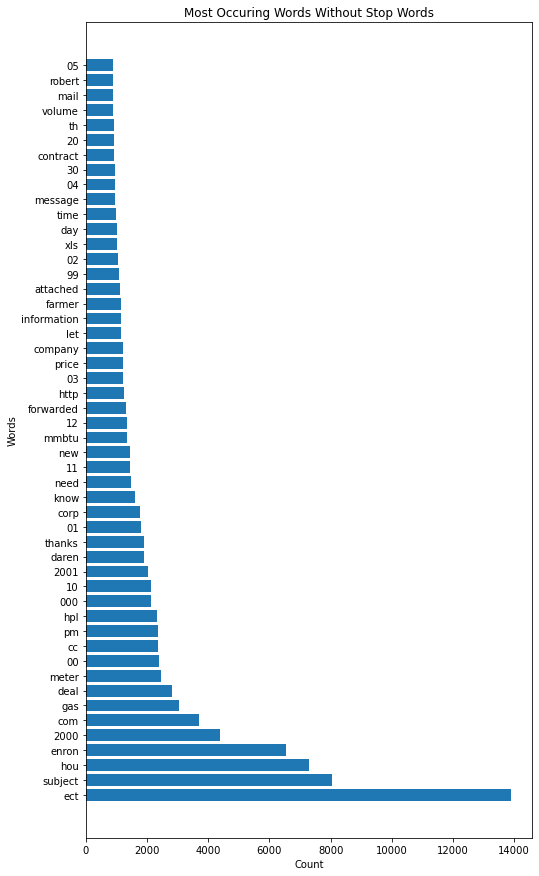

In [165]:
top_words = get_top_n_words_wo_stop_words(df.text, 50)
top_words = convert_to_dict(top_words)
words = list(top_words.keys())
count = list(top_words.values())

fig = plt.figure(figsize = (8, 15))

plt.barh(words,count)
plt.title('Most Occuring Words Without Stop Words')
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

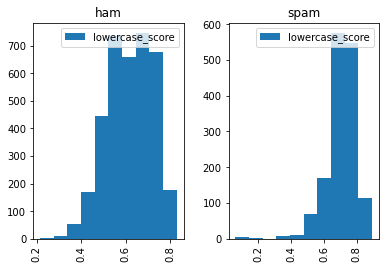

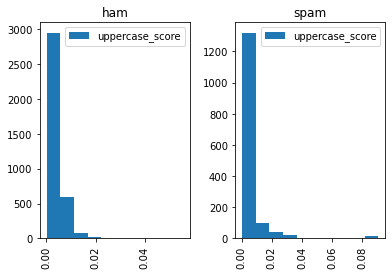

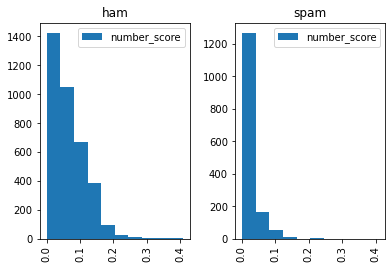

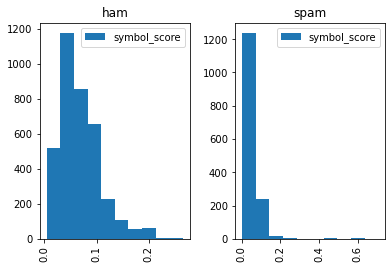

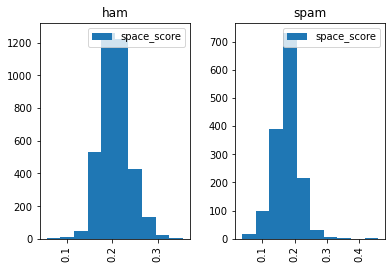

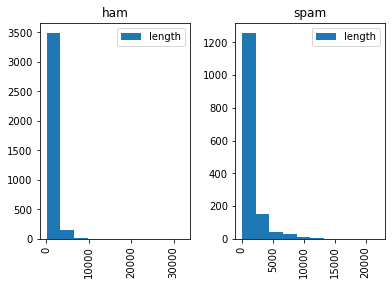

In [142]:
df_fe['lowercase_score'].hist(by=df['label'], legend=1, grid=1)
df_fe['uppercase_score'].hist(by=df['label'], legend=1, grid=1)
df_fe['number_score'].hist(by=df['label'], legend=1, grid=1)
df_fe['symbol_score'].hist(by=df['label'], legend=1, grid=1)
df_fe['space_score'].hist(by=df['label'], legend=1, grid=1)
df_fe['length'].hist(by=df['label'],legend=1, grid=1)

In [143]:
groups = df_fe.groupby('label')

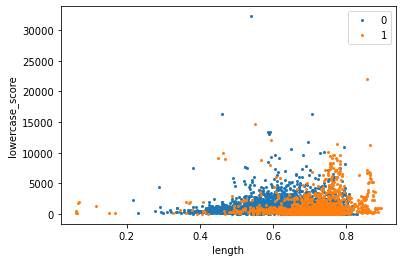

In [144]:

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.lowercase_score, group.length, marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.xlabel("length")
plt.ylabel("lowercase_score")
plt.show()

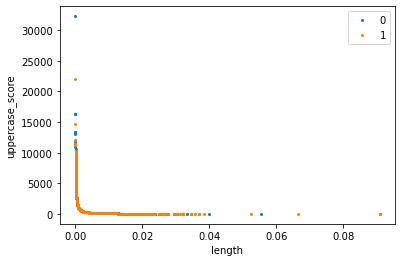

In [145]:
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.uppercase_score, group.length, marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.xlabel("length")
plt.ylabel("uppercase_score")
plt.show()

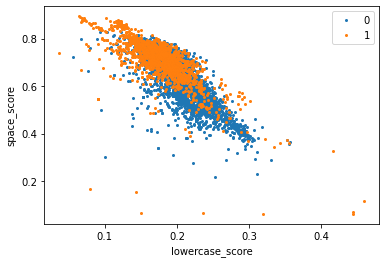

In [146]:
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.space_score, group.lowercase_score, marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.xlabel("lowercase_score")
plt.ylabel("space_score")
plt.show()

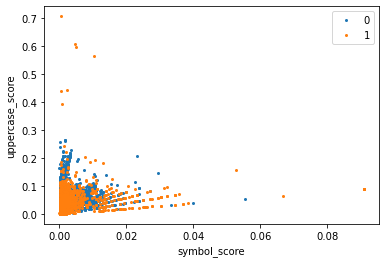

In [147]:
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.uppercase_score, group.symbol_score, marker='o', linestyle='', ms=2, label=name)
ax.legend()
plt.xlabel("symbol_score")
plt.ylabel("uppercase_score")
plt.show()

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'lowercase_score'}>,
        <AxesSubplot:title={'center':'uppercase_score'}>],
       [<AxesSubplot:title={'center':'number_score'}>,
        <AxesSubplot:title={'center':'symbol_score'}>,
        <AxesSubplot:title={'center':'space_score'}>],
       [<AxesSubplot:title={'center':'length'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

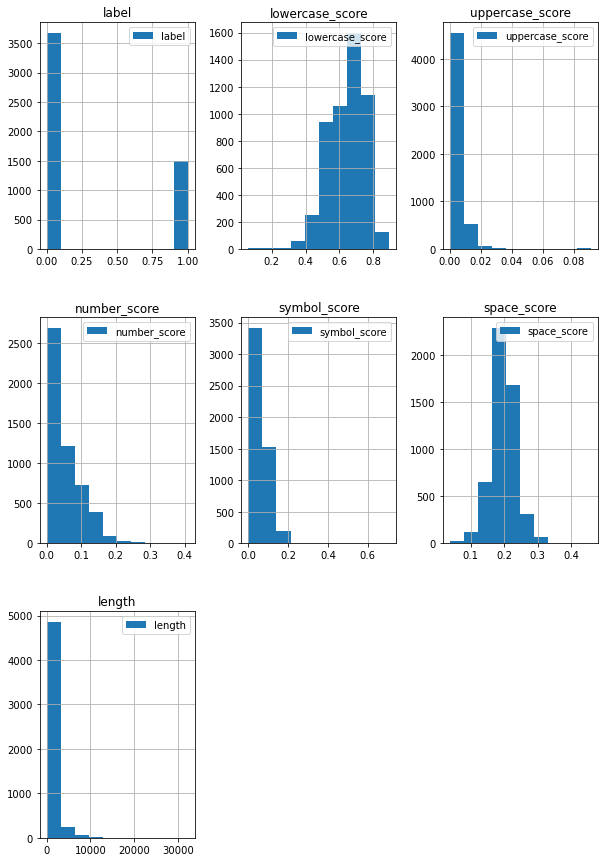

In [148]:
df_fe.hist(legend=1, grid=1, figsize=(10,15))

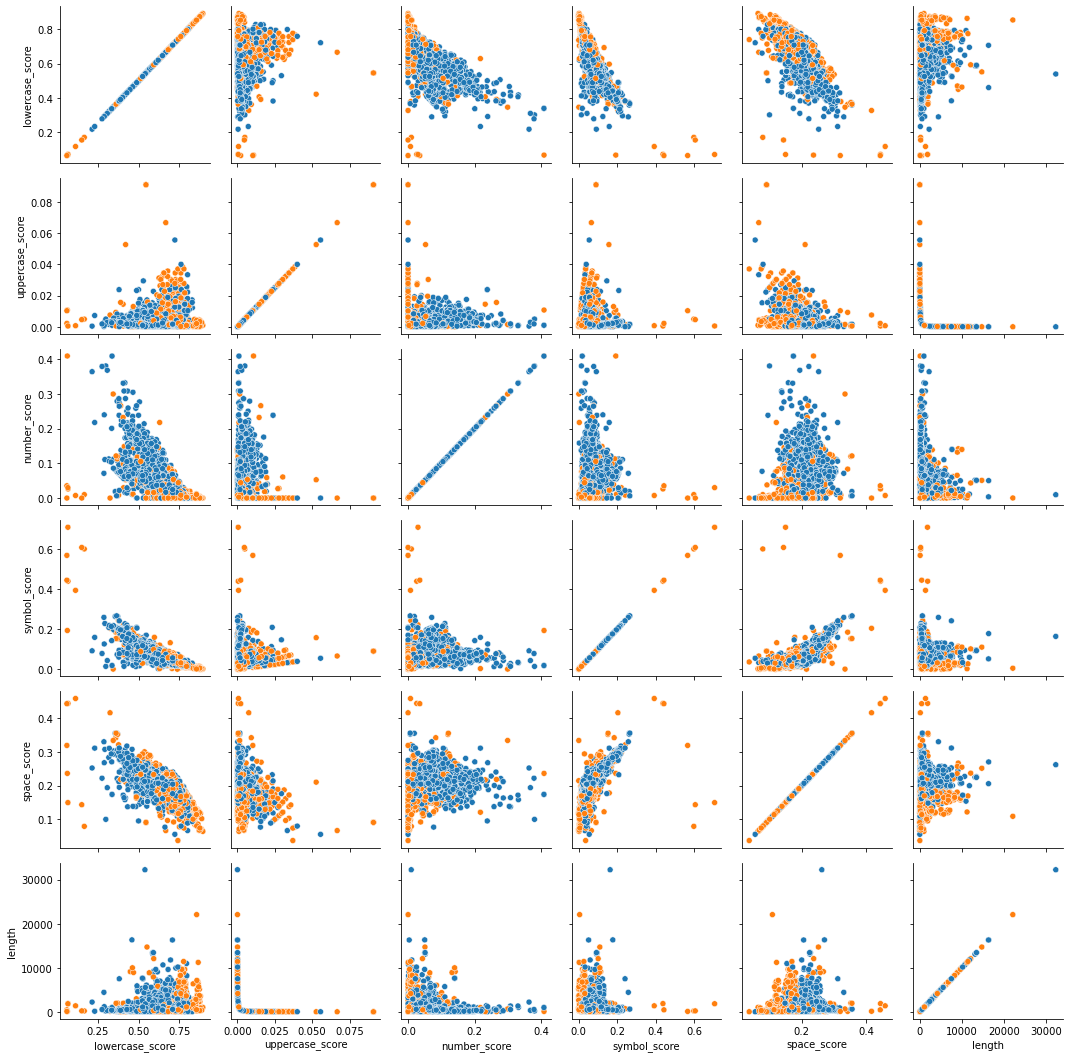

In [168]:
import seaborn as sns
g = sns.PairGrid(df_fe, hue="label")
g.map(sns.scatterplot)

In [149]:
spam_df = df[df['label_num'] == 1] 
ham_df = df[df['label_num'] == 0] 

In [150]:
top_words_in_spam_count = get_top_n_words(spam_df.text, 100)
top_words_in_ham_count = get_top_n_words(ham_df.text, 100)

top_words_in_spam = get_elements(top_words_in_spam_count)
top_words_in_ham = get_elements(top_words_in_ham_count)

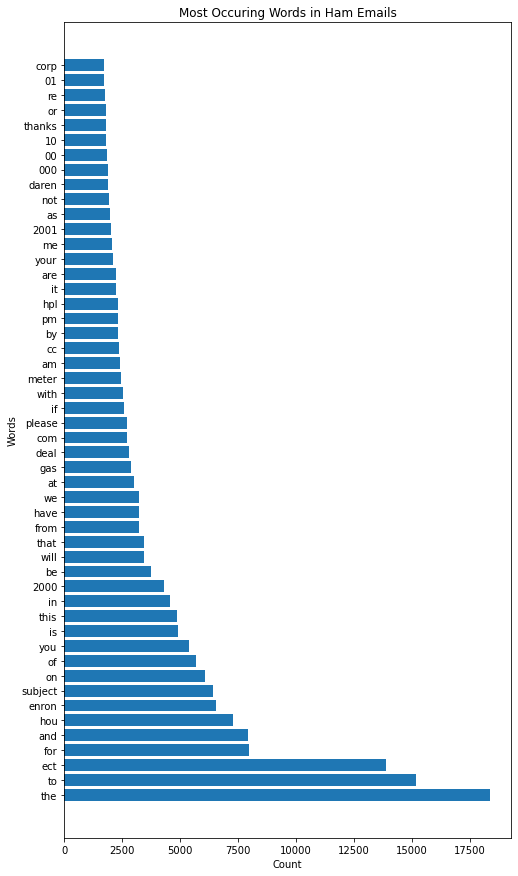

In [170]:
top_words = get_top_n_words(ham_df.text, 50)
top_words = convert_to_dict(top_words)
words = list(top_words.keys())
count = list(top_words.values())

fig = plt.figure(figsize = (8, 15))

plt.barh(words,count)
plt.title('Most Occuring Words in Ham Emails')
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

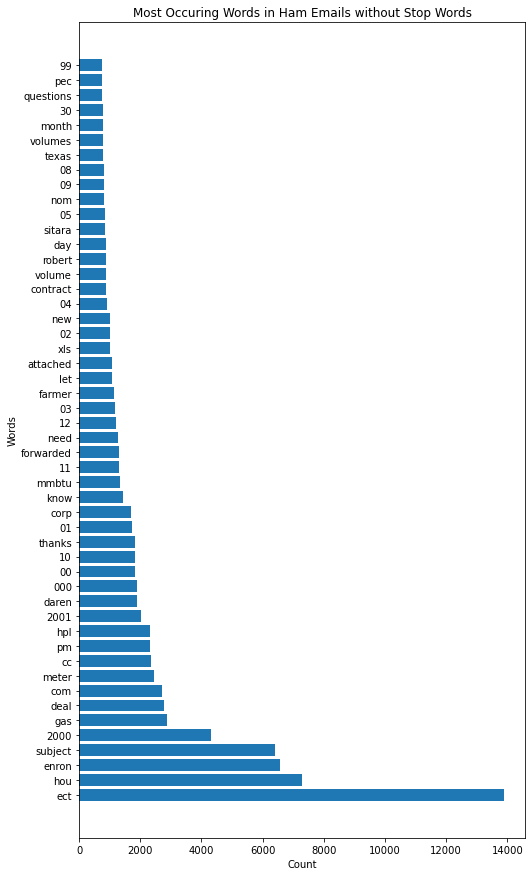

In [171]:
top_words = get_top_n_words_wo_stop_words(ham_df.text, 50)
top_words = convert_to_dict(top_words)
words = list(top_words.keys())
count = list(top_words.values())

fig = plt.figure(figsize = (8, 15))

plt.barh(words,count)
plt.title('Most Occuring Words in Ham Emails without Stop Words')
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

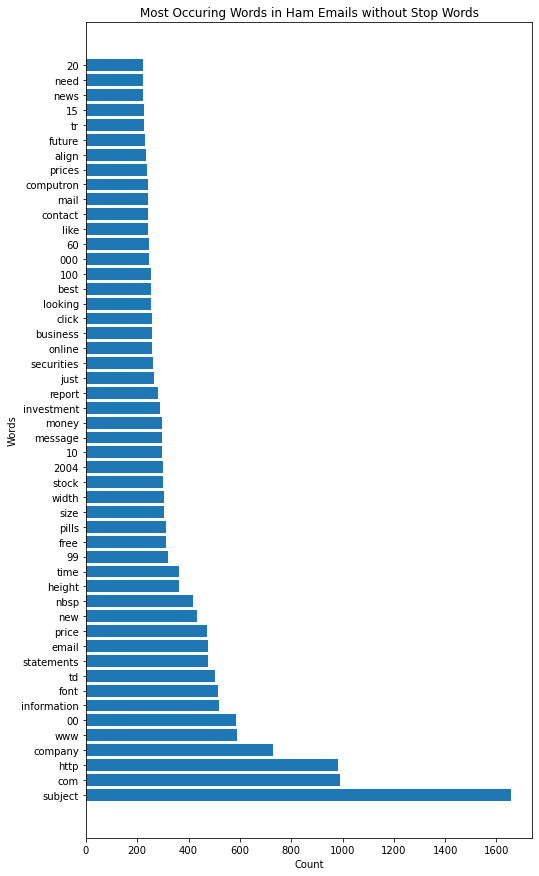

In [172]:
top_words = get_top_n_words_wo_stop_words(spam_df.text, 50)
top_words = convert_to_dict(top_words)
words = list(top_words.keys())
count = list(top_words.values())

fig = plt.figure(figsize = (8, 15))

plt.barh(words,count)
plt.title('Most Occuring Words in Ham Emails without Stop Words')
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

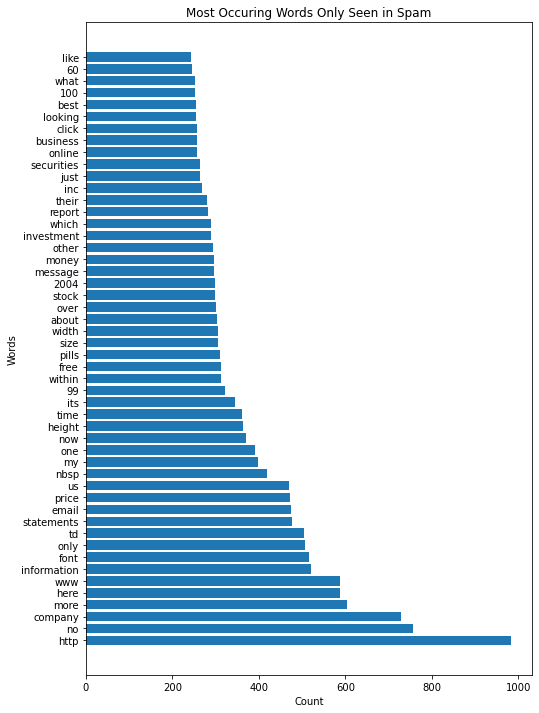

In [173]:
top_words_only_in_spam = in_B_not_in_A(top_words_in_ham,top_words_in_spam_count)

words = list(top_words_only_in_spam.keys())
count = list(top_words_only_in_spam.values())

fig = plt.figure(figsize = (8, 12))

plt.barh(words,count)
plt.title('Most Occuring Words Only Seen in Spam')
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

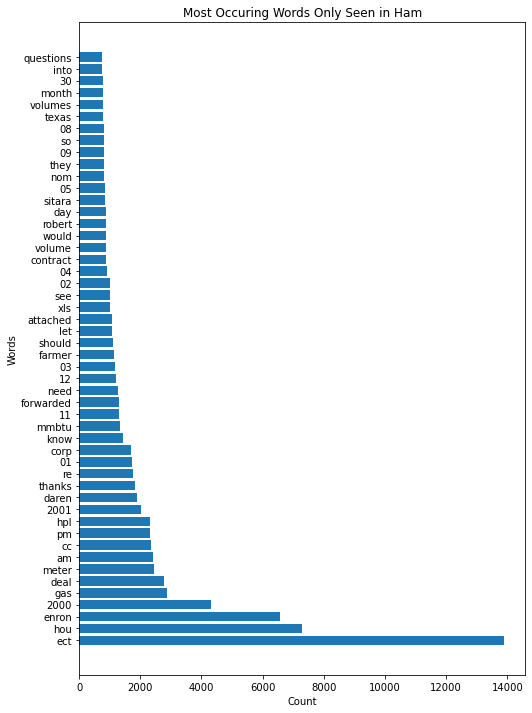

In [174]:
top_words_only_in_ham = in_B_not_in_A(top_words_in_spam,top_words_in_ham_count)

words = list(top_words_only_in_ham.keys())
count = list(top_words_only_in_ham.values())

fig = plt.figure(figsize = (8, 12))

plt.barh(words,count)
plt.title('Most Occuring Words Only Seen in Ham')
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()